## Too much code!

Quick reminder: [ligo-binder](https://github.com/minrk/ligo-binder/blob/master/index.ipynb)

<br><br><br>

This is always a struggle, especially when you're trying to make the code fit in large-font slides.

On the one hand, you need to show the code because that's what you're teaching.

On the other hand, if you show too much, your students won't absorb any of it. It will look like a wall of graffiti.

<br><br><br>

Plotting code is usually worst because you want to overlay many elements to make an informative plot, but that means a lot of complicated code.

### Example

First, let's import some libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from sklearn.linear_model import LogisticRegression

<br><br><br>

We're going to be classifying [penguin species by their bill shape](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris).

<img src="img/culmen_depth.png" style="width: 300px; max-width: 30%;">

In [2]:
penguins = pd.read_csv("data/penguins.csv").dropna()
penguins["species_code"], code_to_name = pd.factorize(penguins["species"])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,2
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,2
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,2
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,2


<br><br><br>

How are they distributed?

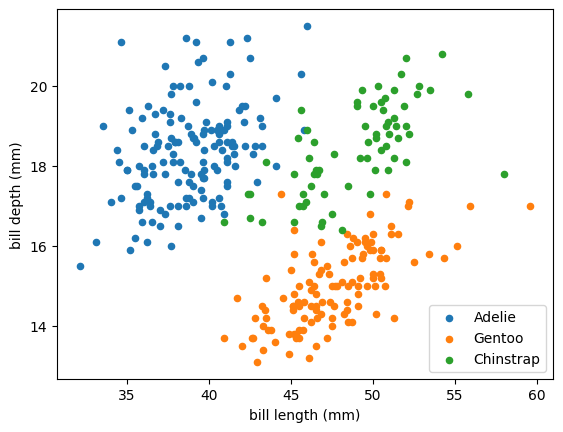

In [3]:
fig, ax = plt.subplots()

# scatter plot for each species in a different color
for species, color in zip(code_to_name, ["tab:blue", "tab:orange", "tab:green"]):
    penguins.query(f"species == {species!r}").plot.scatter(
        "bill_length_mm", "bill_depth_mm", ax=ax, c=color, label=species
    )

ax.legend(loc="lower right")

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None  # ending a plotting cell with None is a good way to avoid unwanted code-output

<br><br><br>

Now build a logistic regression model to classify them.

In [4]:
best_fit = LogisticRegression().fit(
    penguins[["bill_length_mm", "bill_depth_mm"]].values, penguins["species_code"].values
)
best_fit

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<br><br><br>

How well did it do? Let's categorize the entire bill length, bill depth space according to this model.

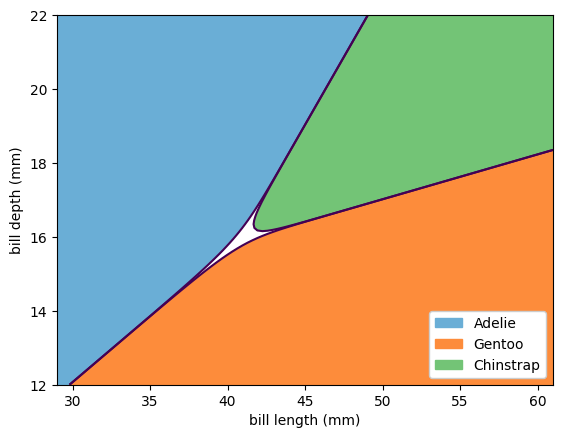

In [5]:
fig, ax = plt.subplots()

xlow = 29; xhigh = 61; ylow = 12; yhigh = 22

# compute the three probabilities for every 2D point in the background
background_x, background_y = np.meshgrid(np.linspace(xlow, xhigh, 100), np.linspace(ylow, yhigh, 100))
background_2d = np.column_stack([background_x.ravel(), background_y.ravel()])
probabilities = best_fit.predict_proba(background_2d)

# fill in regions of greater than 50% probability with the appropriate color
handles = []
for code, (species, colormap) in enumerate(zip(code_to_name, ["Blues", "Oranges", "Greens"])):
    ax.contourf(
        background_x, background_y, probabilities[:, code].reshape(background_x.shape),
        [0.5, 1],
        cmap=colormap,
    )
    handles.append(mpl_patches.Patch(color=plt.get_cmap(colormap)(0.5), label=species))

# draw contour lines where the probabilities cross the 50% threshold
for code in range(len(code_to_name)):
    ax.contour(
        background_x, background_y, probabilities[:, code].reshape(background_x.shape),
        [0.5],
    )

ax.legend(handles=handles, loc="lower right", framealpha=1)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None

<br><br><br>

Now overlay the data on the categorized plane.

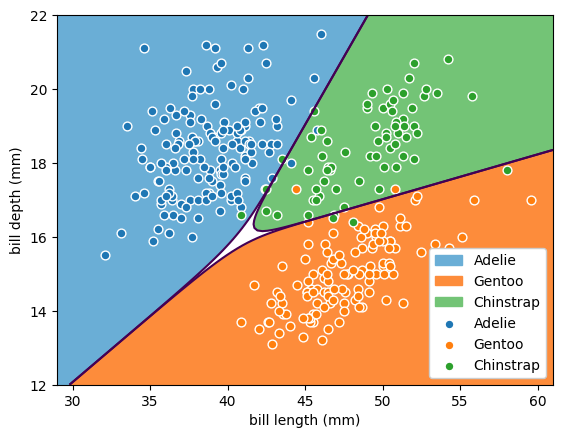

In [6]:
fig, ax = plt.subplots()

xlow = 29; xhigh = 61; ylow = 12; yhigh = 22

# compute the three probabilities for every 2D point in the background
background_x, background_y = np.meshgrid(np.linspace(xlow, xhigh, 100), np.linspace(ylow, yhigh, 100))
background_2d = np.column_stack([background_x.ravel(), background_y.ravel()])
probabilities = best_fit.predict_proba(background_2d)

# fill in regions of greater than 50% probability with the appropriate color
fill_handles = []
for code, (species, colormap) in enumerate(zip(code_to_name, ["Blues", "Oranges", "Greens"])):
    ax.contourf(
        background_x, background_y, probabilities[:, code].reshape(background_x.shape),
        [0.5, 1],
        cmap=colormap,
    )
    fill_handles.append(mpl_patches.Patch(color=plt.get_cmap(colormap)(0.5), label=species))

# draw contour lines where the probabilities cross the 50% threshold
for code in range(len(code_to_name)):
    ax.contour(
        background_x, background_y, probabilities[:, code].reshape(background_x.shape),
        [0.5],
    )

# scatter plot for each species in a different color
for species, color in zip(code_to_name, ["tab:blue", "tab:orange", "tab:green"]):
    penguins.query(f"species == {species!r}").plot.scatter(
        "bill_length_mm", "bill_depth_mm", ax=ax, c=color, ec="white", lw=1, s=40, label=species
    )

scatter_handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=fill_handles + scatter_handles, loc="lower right", framealpha=1)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None

<br><br><br>

## What to do about the giant code block?

For pedagogical reasons, the above presentation shows individual pieces before layering them in the final plot, but that means that the final code block is giant and repeats code already shown.

It's hard to see by eye that it _is_ the same code, copy-pasted. (Mostly.)

The usual way to deal with a programming problem like this is to "factorize" the code into small, reusable functions, but you have an additional constraint:
* if you encapsulate some of the plotting code into a function to reuse later, it might need to be specialized to make it usable in the later context, but
* it has to make sense to students in the original context without extraneous complications. You can't say, "Ignore this part; it's not relevant yet."

<br><br><br>

For instance, in the following:

In [7]:
def plot_data_points(ax):
    # scatter plot for each species in a different color
    for species, color in zip(code_to_name, ["tab:blue", "tab:orange", "tab:green"]):
        penguins.query(f"species == {species!r}").plot.scatter(
            "bill_length_mm", "bill_depth_mm", ax=ax, c=color, ec="white", lw=1, s=40, label=species
        )
    
    handles, _ = ax.get_legend_handles_labels()

    return handles

it's not clear why we're messing with and edge color and size, `ec="white", lw=1, s=40`, but it's because the scatter points will be overlaid on a solid color and they won't show up without white outlines.

It also doesn't explain why it's exporting `handles`, though they'll later be needed to combine labels in the legend. (A plot has only one legend; it doesn't "factorize" perfectly!)

Fortunately, we only need to overlay one thing that automatically generates handles and one thing that needs them to be manually constructed. So we can simplify this function to

In [8]:
def plot_data_points(ax):
    # scatter plot for each species in a different color
    for species, color in zip(code_to_name, ["tab:blue", "tab:orange", "tab:green"]):
        penguins.query(f"species == {species!r}").plot.scatter(
            "bill_length_mm", "bill_depth_mm", ax=ax, c=color, ec="white", lw=1, s=40, label=species
        )

(which still doesn't explain the edge colors, but okay).

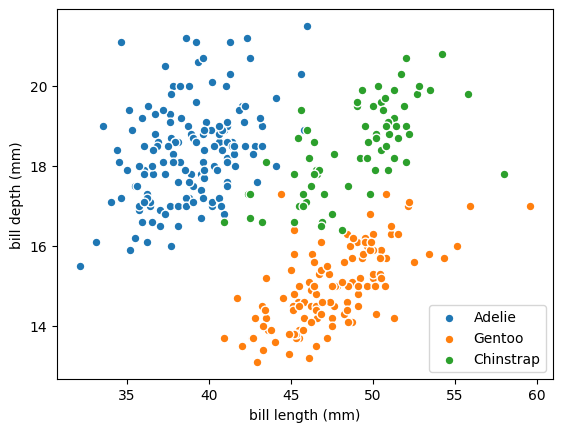

In [9]:
fig, ax = plt.subplots()

plot_data_points(ax)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

ax.legend(loc="lower right")

None

<br><br><br>

Now for the fill regions. We need to specify the axis ranges, so let's make them (default) parameters of the function.

In [10]:
def plot_model_prediction(ax, xlow=29, xhigh=61, ylow=12, yhigh=22):
    # compute the three probabilities for every 2D point in the background
    background_x, background_y = np.meshgrid(np.linspace(xlow, xhigh, 100), np.linspace(ylow, yhigh, 100))
    background_2d = np.column_stack([background_x.ravel(), background_y.ravel()])
    probabilities = best_fit.predict_proba(background_2d)
    
    # fill in regions of greater than 50% probability with the appropriate color
    fill_handles = []
    for code, (species, colormap) in enumerate(zip(code_to_name, ["Blues", "Oranges", "Greens"])):
        ax.contourf(
            background_x, background_y, probabilities[:, code].reshape(background_x.shape),
            [0.5, 1],
            cmap=colormap,
        )
        fill_handles.append(mpl_patches.Patch(color=plt.get_cmap(colormap)(0.5), label=species))
    
    # draw contour lines where the probabilities cross the 50% threshold
    for code in range(len(code_to_name)):
        ax.contour(
            background_x, background_y, probabilities[:, code].reshape(background_x.shape),
            [0.5],
        )

    # for the legend
    return fill_handles

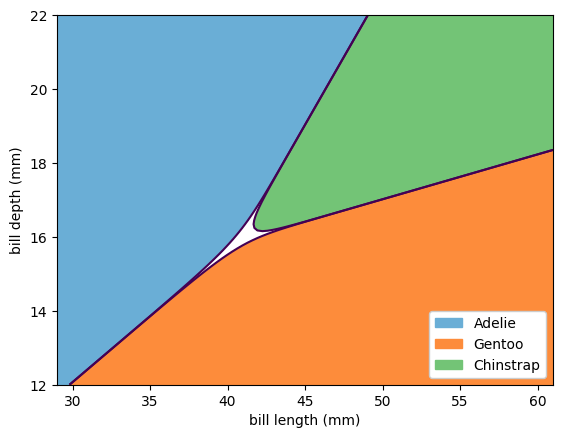

In [11]:
fig, ax = plt.subplots()

fill_handles = plot_model_prediction(ax)

ax.legend(handles=fill_handles, loc="lower right", framealpha=1)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None

<br><br><br>

Now it isn't too cumbersome to combine them.

Some parts—the declaration of axes (`ax`), the legend, and the axis labeling—are kept outside of the functions because they each appear in a plotting cell exactly once.

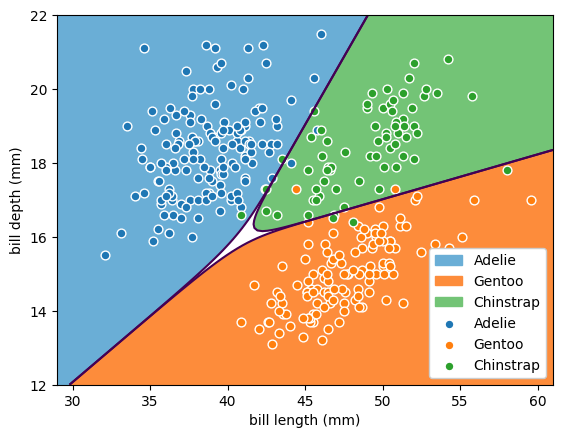

In [12]:
fig, ax = plt.subplots()

fill_handles = plot_model_prediction(ax)
plot_data_points(ax)
scatter_handles, _ = ax.get_legend_handles_labels()

ax.legend(handles=fill_handles + scatter_handles, loc="lower right", framealpha=1)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None

<br><br><br>

## Even better: make a mini-library

Even though `plot_model_prediction` has been encapsulated in a function, it contains complexities we don't need the students to see.

Thinking about what's important in this lesson, it's
1. "categorized data are colored scatter points" and
2. "model predictions are fill-colors on the plane".

The

```python
penguins.query(f"species == {species!r}").plot.scatter("bill_length_mm", "bill_depth_mm")
```

is self-explanatory, but

```python
# compute the three probabilities for every 2D point in the background
background_x, background_y = np.meshgrid(np.linspace(xlow, xhigh, 100), np.linspace(ylow, yhigh, 100))
background_2d = np.column_stack([background_x.ravel(), background_y.ravel()])
probabilities = best_fit.predict_proba(background_2d)

# fill in regions of greater than 50% probability with the appropriate color
fill_handles = []
for code, (species, colormap) in enumerate(zip(code_to_name, ["Blues", "Oranges", "Greens"])):
    ax.contourf(
        background_x, background_y, probabilities[:, code].reshape(background_x.shape),
        [0.5, 1],
        cmap=colormap,
    )
    fill_handles.append(mpl_patches.Patch(color=plt.get_cmap(colormap)(0.5), label=species))

# draw contour lines where the probabilities cross the 50% threshold
for code in range(len(code_to_name)):
    ax.contour(
        background_x, background_y, probabilities[:, code].reshape(background_x.shape),
        [0.5],
    )
```

is a lot of nonsense for "color the plane by model prediction." A lot of this can be hidden in a mini-library.

See [util.py](util.py).

<br><br><br>

In [13]:
from util import color_plane_by_prediction

In [14]:
def plot_model_prediction(ax, xlow=29, xhigh=61, ylow=12, yhigh=22):
    return color_plane_by_prediction(
        best_fit,
        code_to_name,
        ["Blues", "Oranges", "Greens"],
        xlow=xlow,
        xhigh=xhigh,
        ylow=ylow,
        yhigh=yhigh,
        ax=ax,
    )

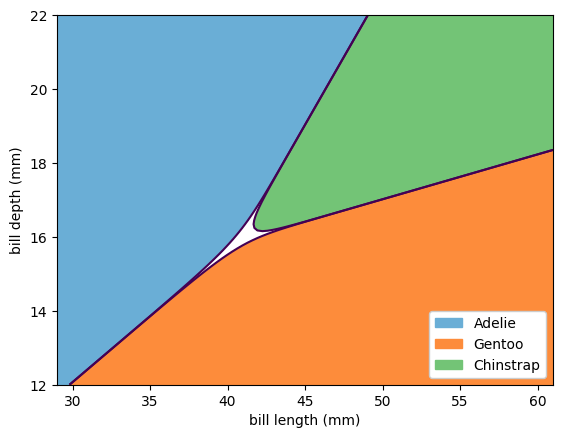

In [15]:
fig, ax = plt.subplots()

fill_handles = plot_model_prediction(ax)

ax.legend(handles=fill_handles, loc="lower right", framealpha=1)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None

and

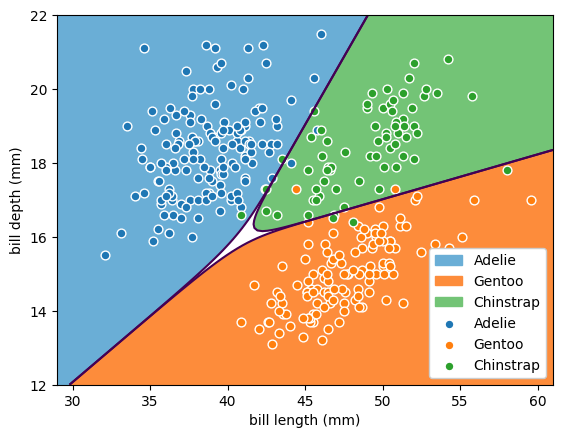

In [17]:
fig, ax = plt.subplots()

fill_handles = plot_model_prediction(ax)

plot_data_points(ax)
scatter_handles, _ = ax.get_legend_handles_labels()

ax.legend(handles=fill_handles + scatter_handles, loc="lower right", framealpha=1)

ax.set_xlabel("bill length (mm)")
ax.set_ylabel("bill depth (mm)")

None

<br><br><br>

If you hide code in a mini-library, it _must_ be irrelevant to what you're trying to teach. You're separating code into a pedagogical part and a technical part: the pedagogical part must be all about the data, models, and whatever else you're teaching, and the technical part must be irrelevant things like getting colors onto a plot.